In [ ]:
# Question: Combining Multiple Outlier Detection Methods
# Description: Combine Z-score, IQR, and Boxplot methods to detect and compare outliers in adataset.




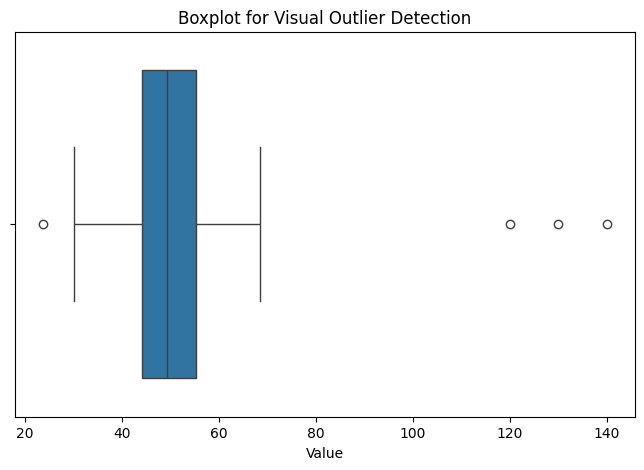


Outliers detected by Z-score:
     Value   Z_Score  Outlier_Z  Outlier_IQR  Outlier_Boxplot  \
100  120.0  4.203638       True         True             True   
101  130.0  4.815716       True         True             True   
102  140.0  5.427794       True         True             True   

     Outlier_Combined  
100              True  
101              True  
102              True  

Outliers detected by IQR:
          Value   Z_Score  Outlier_Z  Outlier_IQR  Outlier_Boxplot  \
74    23.802549 -1.684398      False         True             True   
100  120.000000  4.203638       True         True             True   
101  130.000000  4.815716       True         True             True   
102  140.000000  5.427794       True         True             True   

     Outlier_Combined  
74               True  
100              True  
101              True  
102              True  

Outliers detected by any method (combined):
          Value   Z_Score  Outlier_Z  Outlier_IQR  Outlier_Boxplot  \

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Step 1: Generate or load sample data
np.random.seed(42)
data = np.random.normal(50, 10, 100).tolist() + [120, 130, 140]  # Add outliers
df = pd.DataFrame(data, columns=['Value'])

# Step 2: Z-score method
df['Z_Score'] = zscore(df['Value'])
df['Outlier_Z'] = df['Z_Score'].abs() > 3

# Step 3: IQR method
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Outlier_IQR'] = (df['Value'] < lower_bound) | (df['Value'] > upper_bound)

# Step 4: Boxplot visualization
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Value'])
plt.title('Boxplot for Visual Outlier Detection')
plt.show()

# Step 5: Compare all detection methods
df['Outlier_Boxplot'] = df['Outlier_IQR']  # Boxplot visually reflects IQR-based outliers
df['Outlier_Combined'] = df[['Outlier_Z', 'Outlier_IQR']].any(axis=1)

# Step 6: View outliers detected by each method
print("\nOutliers detected by Z-score:")
print(df[df['Outlier_Z']])

print("\nOutliers detected by IQR:")
print(df[df['Outlier_IQR']])

print("\nOutliers detected by any method (combined):")
print(df[df['Outlier_Combined']])
